# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | koraput
Processing Record 2 of Set 1 | smithers
Processing Record 3 of Set 1 | kailua-kona
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | krasnovishersk
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | nar'yan-mar
Processing Record 10 of Set 1 | happy valley-goose bay
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | lazaro cardenas
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | kenai
Processing Record 16 of Set 1 | ejigbo
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | iquique
Processing Record 21 of Set 1 | ushuaia
Process

Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | fauske
Processing Record 42 of Set 4 | la passe
Processing Record 43 of Set 4 | al jabin
Processing Record 44 of Set 4 | tommot
Processing Record 45 of Set 4 | port mathurin
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | remire-montjoly
Processing Record 48 of Set 4 | bhadrakh
Processing Record 49 of Set 4 | cururupu
Processing Record 0 of Set 5 | aden
Processing Record 1 of Set 5 | ulladulla
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | uturoa
Processing Record 4 of Set 5 | gadzhiyevo
Processing Record 5 of Set 5 | praia da vitoria
Processing Record 6 of Set 5 | maitum
Processing Record 7 of Set 5 | constantia
Processing Record 8 of Set 5 | altai
Processing Record 9 of Set 5 | hammerfest
Processing Record 10 of Set 5 | usogorsk
Processing Record 11 of Set 5 | zaragoza
Processing Record 12 of Set 5 | tsiombe
Processing Record 13 of Set 5 | vilyuchinsk
Process

Processing Record 35 of Set 8 | souillac
Processing Record 36 of Set 8 | jiangmen
Processing Record 37 of Set 8 | al jawf
Processing Record 38 of Set 8 | punta del este
Processing Record 39 of Set 8 | kavaratti
Processing Record 40 of Set 8 | al mijlad
Processing Record 41 of Set 8 | i-n-salah
Processing Record 42 of Set 8 | bullhead city
Processing Record 43 of Set 8 | san patricio
Processing Record 44 of Set 8 | murray bridge
Processing Record 45 of Set 8 | rumoi
Processing Record 46 of Set 8 | palikir - national government center
Processing Record 47 of Set 8 | sitia
Processing Record 48 of Set 8 | sao geraldo do araguaia
Processing Record 49 of Set 8 | lashio
Processing Record 0 of Set 9 | kill devil hills
Processing Record 1 of Set 9 | ishikawa
Processing Record 2 of Set 9 | galesong
Processing Record 3 of Set 9 | dawei
Processing Record 4 of Set 9 | la sarre
Processing Record 5 of Set 9 | labytnangi
Processing Record 6 of Set 9 | sukumo
Processing Record 7 of Set 9 | qaisumah
Pro

Processing Record 24 of Set 12 | aistala
Processing Record 25 of Set 12 | quincy
Processing Record 26 of Set 12 | las cruces
Processing Record 27 of Set 12 | angaur state
Processing Record 28 of Set 12 | patacamaya
Processing Record 29 of Set 12 | mahanoro
Processing Record 30 of Set 12 | solnechnyy
Processing Record 31 of Set 12 | tibanbang
Processing Record 32 of Set 12 | el granada
Processing Record 33 of Set 12 | merizo village
Processing Record 34 of Set 12 | taltal
Processing Record 35 of Set 12 | lata
Processing Record 36 of Set 12 | bandon
Processing Record 37 of Set 12 | kupang
Processing Record 38 of Set 12 | revelstoke
Processing Record 39 of Set 12 | nuku'alofa
Processing Record 40 of Set 12 | ghanzi
Processing Record 41 of Set 12 | coxen hole
Processing Record 42 of Set 12 | meadow lake
Processing Record 43 of Set 12 | diebougou
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,koraput,18.8167,82.7167,14.88,51,0,1.17,IN,1703538548
1,smithers,54.7804,-127.1743,-1.33,88,100,1.93,CA,1703538548
2,kailua-kona,19.6406,-155.9956,28.11,63,20,4.63,US,1703538464
3,afaahiti,-17.7500,-149.2833,28.93,84,96,3.20,PF,1703538474
4,punta arenas,-53.1500,-70.9167,12.06,47,0,13.89,CL,1703538454


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,koraput,18.8167,82.7167,14.88,51,0,1.17,IN,1703538548
1,smithers,54.7804,-127.1743,-1.33,88,100,1.93,CA,1703538548
2,kailua-kona,19.6406,-155.9956,28.11,63,20,4.63,US,1703538464
3,afaahiti,-17.7500,-149.2833,28.93,84,96,3.20,PF,1703538474
4,punta arenas,-53.1500,-70.9167,12.06,47,0,13.89,CL,1703538454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

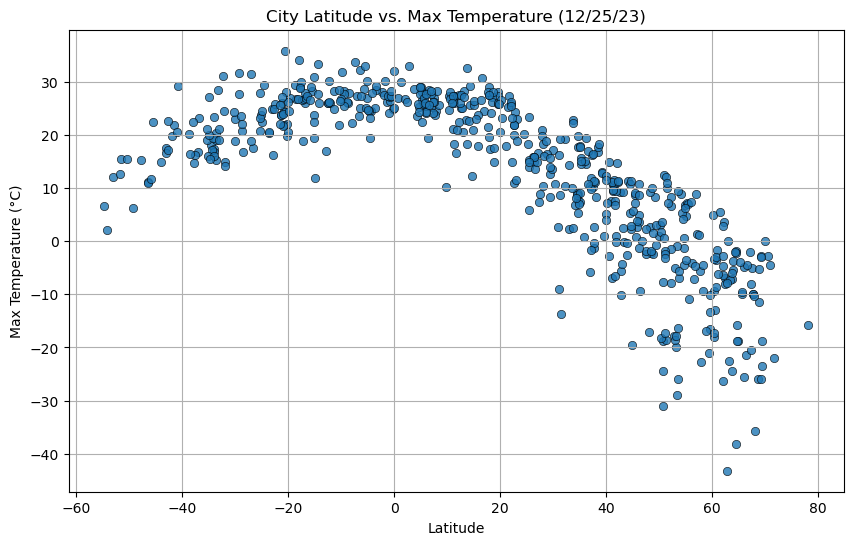

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))  # Use current date for title
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

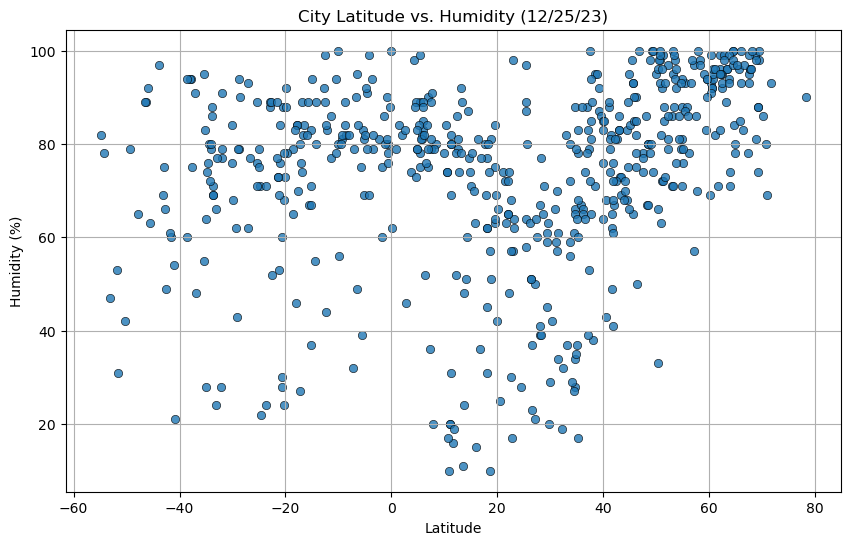

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))  # Use current date for title
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

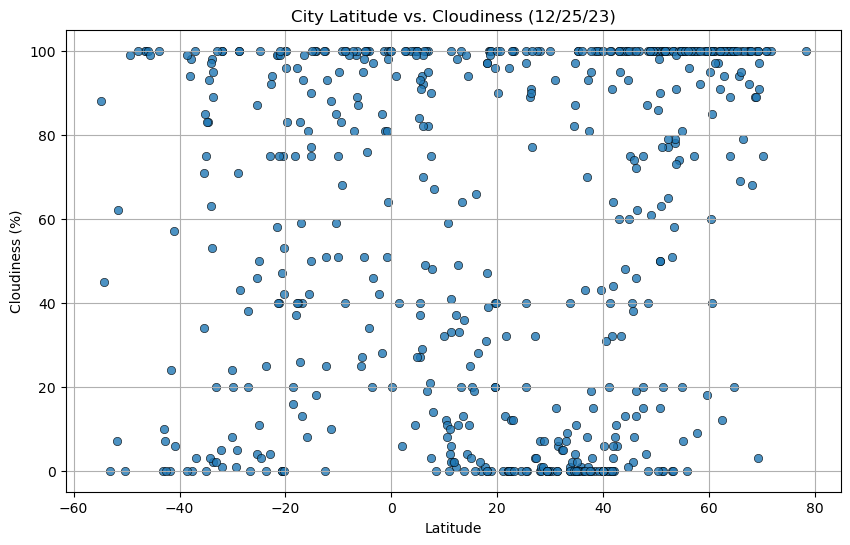

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))  # Use current date for title
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

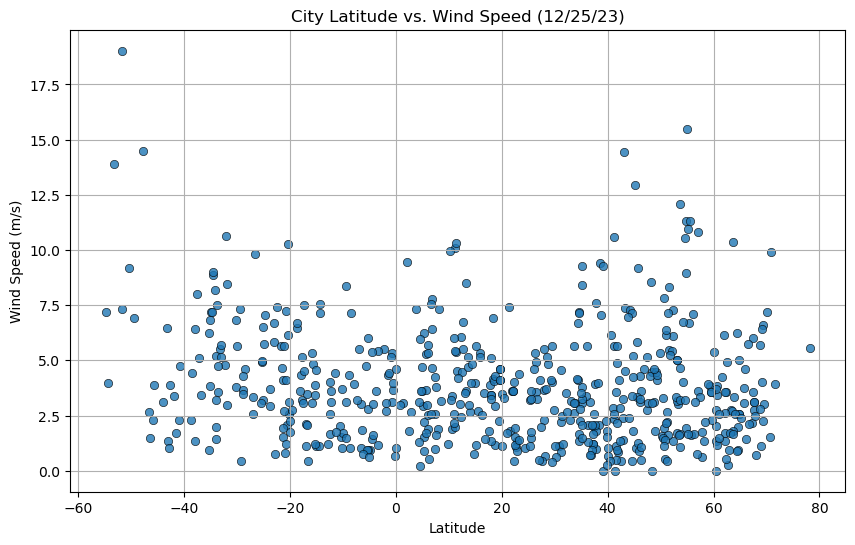

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))  # Use current date for title
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_reg(x_values, y_values, title, filename):
    # Perform regression on southern hemisphere
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=0.5, alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(title.split(' vs. ')[1])
    #plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.text(min(x_values),max(y_values),line_eq,fontsize=12, color='red')

    print(f"The r-value is: {r_value}")

    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,koraput,18.8167,82.7167,14.88,51,0,1.17,IN,1703538548
1,smithers,54.7804,-127.1743,-1.33,88,100,1.93,CA,1703538548
2,kailua-kona,19.6406,-155.9956,28.11,63,20,4.63,US,1703538464
5,krasnovishersk,60.4078,57.0820,-9.35,93,60,2.74,RU,1703538549
8,nar'yan-mar,67.6713,53.0870,-9.94,96,100,3.13,RU,1703538484


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,afaahiti,-17.7500,-149.2833,28.93,84,96,3.20,PF,1703538474
4,punta arenas,-53.1500,-70.9167,12.06,47,0,13.89,CL,1703538454
6,invercargill,-46.4000,168.3500,11.04,89,100,1.46,NZ,1703538469
7,grytviken,-54.2811,-36.5092,2.08,78,45,3.98,GS,1703538549
10,waitangi,-43.9535,-176.5597,14.90,97,100,3.13,NZ,1703538460


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8557920678805758


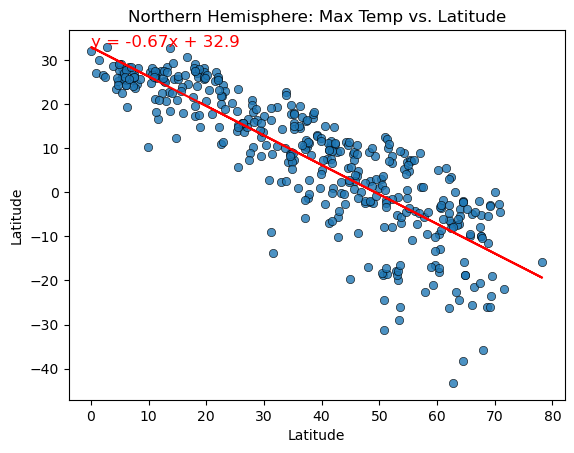

In [15]:
# Linear regression on Northern Hemisphere
plot_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere: Max Temp vs. Latitude", "../output_data/NH_Temp_vs_Lat.png")

The r-value is: 0.680127643724206


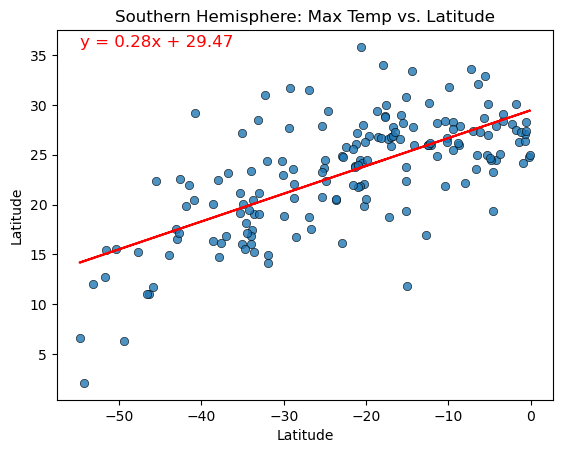

In [16]:
# Linear regression on Southern Hemisphere
plot_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere: Max Temp vs. Latitude", "../output_data/SH_Temp_vs_Lat.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43376808867951333


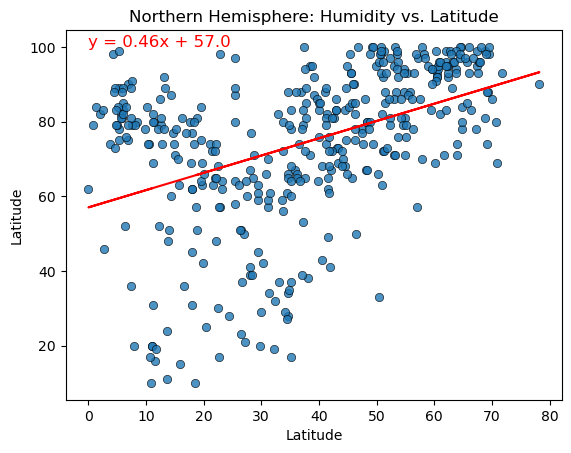

In [17]:
plot_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Humidity vs. Latitude", "../output_data/NH_hHum_vs_Lat.png")

The r-value is: 0.22519185757678611


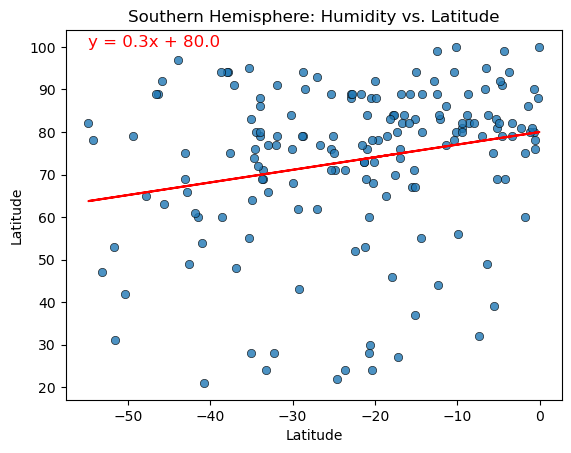

In [18]:
# Southern Hemisphere
plot_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere: Humidity vs. Latitude", "../output_data/SH_hHum_vs_Lat.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3409950742593426


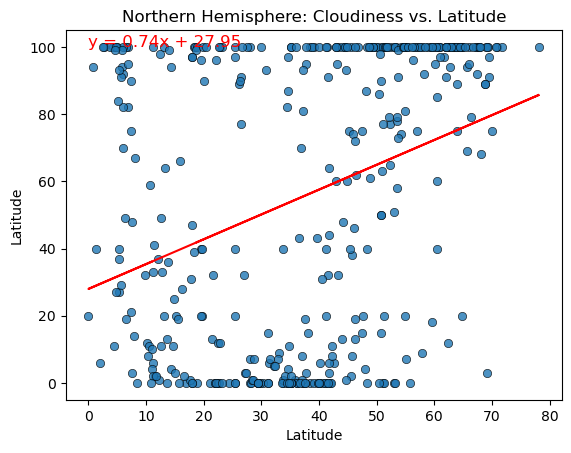

In [19]:
# Northern Hemisphere
plot_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude", "../output_data/NH_Cloud_vs_Lat.png")

The r-value is: 0.24123682459837575


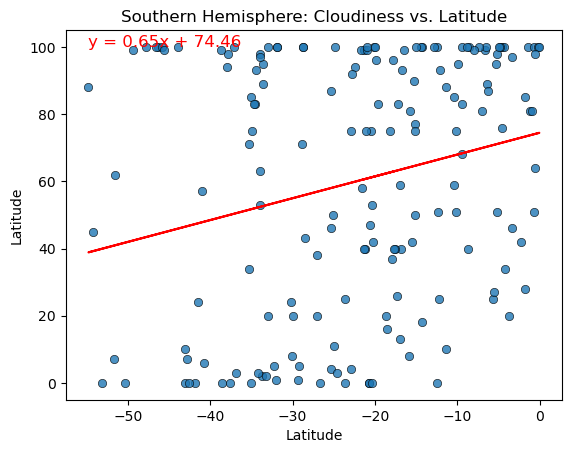

In [20]:
# Southern Hemisphere
plot_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness vs. Latitude", "../output_data/SH_Cloud_vs_Lat.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007694862660750261


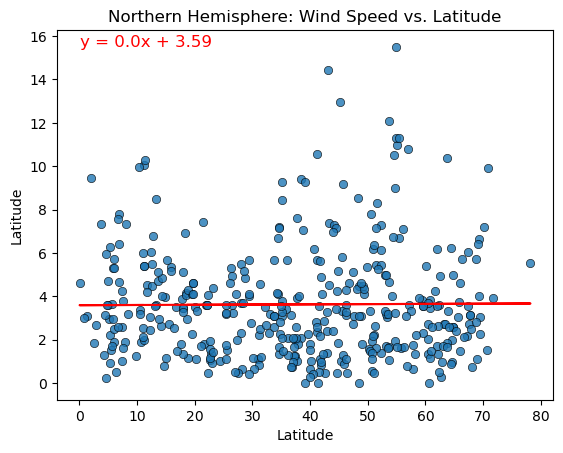

In [21]:
# Northern Hemisphere
plot_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude", "../output_data/NH_WindS_vs_Lat.png")

The r-value is: -0.372228348537498


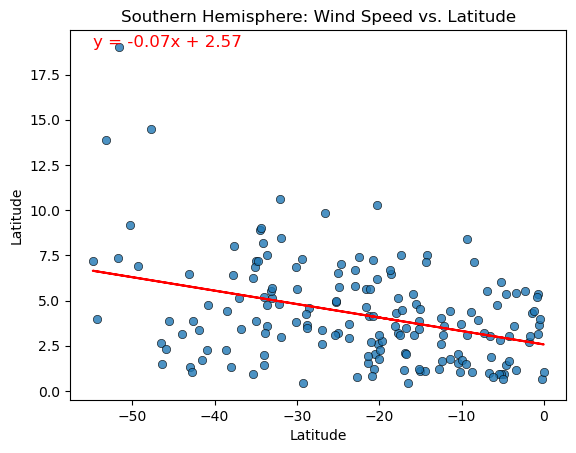

In [22]:
# Southern Hemisphere
plot_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere: Wind Speed vs. Latitude", "../output_data/SH_WindS_vs_Lat.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:

In the northern hemisphere, we observe a subtle positive correlation between latitude and wind speed. This suggests that as you head northward, there is a tendency for wind speeds to slightly increase.

Southern Hemisphere:

Conversely, in the southern hemisphere, a mild negative correlation is evident, indicating a tendency for wind speeds to decrease as one approaches the equator.

Summary:

In summary, wind speeds exhibit a modest elevation near the poles and a decrease in proximity to the equator. It's important to note that these relationships are not exceptionally robust. The correlations hint at nuanced wind patterns influenced by hemisphere and distance from the equator.